<h1 align="center">Volume 1: Facial Recognition.</h1>

    Nathan Schill
    Sec. 3
    Tues. Nov. 22, 2022

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from imageio import imread

### Helper Functions

In [2]:
def get_faces(path="./faces94"):
    """Traverse the specified directory to obtain one image per subdirectory. 
    Flatten and convert each image to grayscale.
    
    Parameters:
        path (str): The directory containing the dataset of images.  
    
    Returns:
        ((mn,k) ndarray) An array containing one column vector per
            subdirectory. k is the number of people, and each original
            image is mxn.
    """
    # Traverse the directory and get one image per subdirectory.
    faces = []
    for (dirpath, dirnames, filenames) in os.walk(path):
        for fname in filenames:
            if fname[-3:]=="jpg":       # Only get jpg images.
                # Load the image, convert it to grayscale,
                # and flatten it into a vector.
                faces.append(np.ravel(imread(dirpath+"/"+fname, as_gray=True)))
                break
    # Put all the face vectors column-wise into a matrix.
    return np.transpose(faces)


def sample_faces(k, path="./faces94"):
    """Generate k sample images from the given path.

    Parameters:
        n (int): The number of sample images to obtain. 
        path(str): The directory containing the dataset of images.  
    
    Yields:
        ((mn,) ndarray): An flattend mn-array representing a single
        image. k images are yielded in total.
    """
    files = []
    for (dirpath, dirnames, filenames) in os.walk(path):
        for fname in filenames:
            if fname[-3:]=="jpg":       # Only get jpg images.
                files.append(dirpath+"/"+fname)

    # Get a subset of the image names and yield the images one at a time.
    test_files = np.random.choice(files, k, replace=False)
    for fname in test_files:
        yield np.ravel(imread(fname, as_gray=True))

### Problem 1 

- Implement `show()`.
- Use `show()` to display a face from the `faces94` dataset.

In [3]:
def show(image, m=200, n=180):
    """Plot the flattened grayscale 'image' of width 'n' and height 'm'.
    
    Parameters:
        image ((mn,) ndarray): A flattened image.
        m (int): The original number of rows in the image.
        n (int): The original number of columns in the image.
    """
    
    # Reshape image to be mxn
    image = np.reshape(image, (m,n))

    # Show image
    plt.imshow(image, cmap='gray')
    plt.show()

In [4]:
F = get_faces()

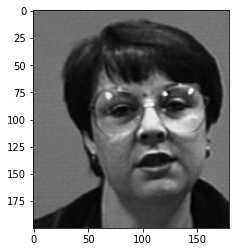

In [5]:
# Test showing the first image (the first column of F)
show(F[:,0])

In [6]:
class FacialRec(object):
    """Class for storing a database of face images, with methods for
    matching other faces to the database.
    
    Attributes:
        F ((mn,k) ndarray): The flatten images of the dataset, where
            k is the number of people, and each original image is mxn.
        mu ((mn,) ndarray): The mean of all flatten images.
        Fbar ((mn,k) ndarray): The images shifted by the mean.
        U ((mn,k) ndarray): The U in the compact SVD of Fbar;
            the columns are the eigenfaces.
    """
    # Problems 2-3
    def __init__(self, path='./faces94'):
        """Initialize the F, mu, Fbar, and U attributes.
        This is the main part of the computation.
        """
        
        # Store faces in F
        self.F = get_faces(path)

        # Compute the mean face by taking a mean of F along each row
        self.mean_face = np.mean(F, axis=1)
        
        # Compute the mean-shifted faces
        self.Fbar = self.F - self.mean_face[:,np.newaxis]

        # Compute the SVD and store U
        self.U, S, Vh = np.linalg.svd(self.Fbar, full_matrices=False)
        

    # Problem 3
    def project(self, A, s):
        """Project a face vector onto the subspace spanned by the first s
        eigenfaces, and represent that projection in terms of those eigenfaces.
        
        Parameters:
            A((mn,) or (mn,l) ndarray): The array to be projected. 
            s(int): the number of eigenfaces.
        Returns: 
            ((s,) ndarray): An array of the projected image of s eigenfaces.
        """

        # Return (U_s)^T @ A
        return self.U[:,:s].T@A

    # Problem 5
    def find_nearest(self, g, s=38):
        """Find the index j such that the jth column of F is the face that is
        closest to the face image 'g'.
        
        Parameters:
            g ((mn,) ndarray): A flattened face image.
            s (int): the number of eigenfaces to use in the projection.

        Returns:
            (int): the index of the column of F that is the best match to
                   the input face image 'g'.
        """
        
        # Compute ghat and Fhat
        ghat = self.project(g, s)
        Fhat = self.project(self.F, s)

        # Return the index of the best matching face from Fhat
        return np.argmin([np.linalg.norm(fhat - ghat) for fhat in Fhat.T])


    # Problem 6
    def match(self, image, s=38, m=200, n=180):
        """Display an image along with its closest match from the dataset. 
        
        Parameters:
            image ((mn,) ndarray): A flattened face image.
            s (int): The number of eigenfaces to use in the projection.
            m (int): The original number of rows in the image.
            n (int): The original number of columns in the image.
        """

        # Find the index of the nearest image
        nearest_index = self.find_nearest(image, s)

        # Show the original and its closest match
        show(image)
        show(F[:,nearest_index])

### Problem 2

- In `FacialRec.__init__()`, compute $F$, the mean face $\boldsymbol{\mu}$, and the mean-shifted faces $\bar{F}$.
Store each as an attribute.

- Initialize a `FacialRec` object and display its mean face, plus an original image and its shifted face.

In [7]:
# Instantiate FacialRec
fr = FacialRec()

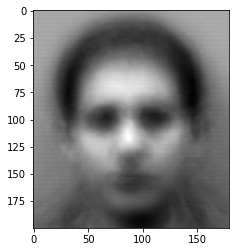

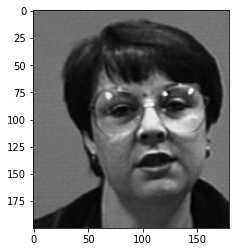

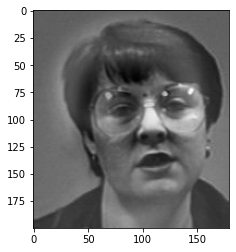

In [8]:
# Show the mean face, the first face, and the first mean-shifted face
show(fr.mean_face)
show(fr.F[:,0])
show(fr.Fbar[:,0])

### Problem 3

- In `FacialRec.__init__()`, compute the compact SVD of $\bar{F}$ and store the $U$ as an attribute.
- Use `show()` to display some of the eigenfaces (the columns of $U$).
- Implement `FacialRec.project()` (in a single line).


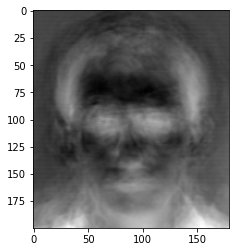

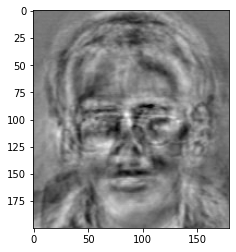

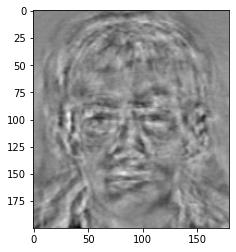

In [9]:
# Show the 1st, 50th, and 100th eigenfaces
show(fr.U[:,0])
show(fr.U[:,50])
show(fr.U[:,100])

### Problem 4

- Select one of the shifted images $\bar{\mathbf{f}}_i$.
- For at least 4 values of $s$, use `FacialRec.project()` to compute the corresponding $s$-projection $\widehat{\mathbf{f}}_i$, then compute the reconstruction $\widetilde{\mathbf{f}}_i$.
- Display each of the reconstructions and the original image.

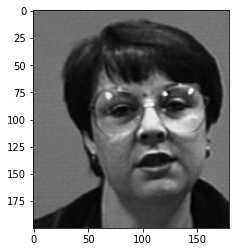

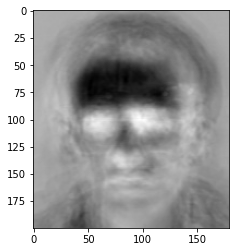

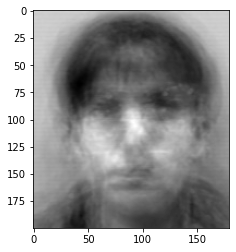

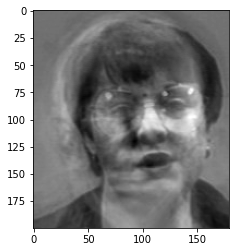

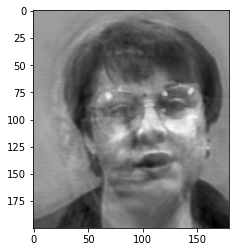

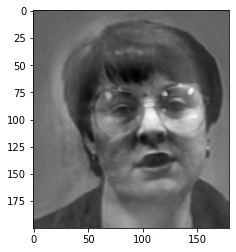

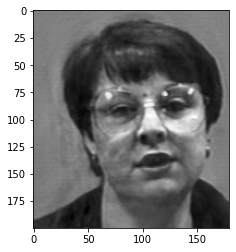

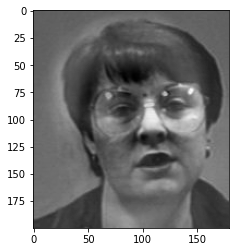

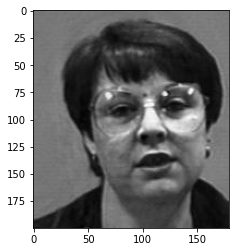

In [12]:
# Show the first original face
show(fr.F[:,0])

# Get the mean-shifted version
face = fr.Fbar[:,0]

# Display reconstructions of the first face for the specified values of s
for s in (5, 19, 50, 75):
    show(fr.U[:,:s] @ fr.project(face, s) + fr.mean_face)

### Problem 5 
Implement `FacialRec.find_nearest()`.

### Problem 6

- Implement `FacialRec.match()`.
- Generate some random faces with `sample_faces()`, and use `FacialRec.match()` to find the closest match (let $s=38$).
- For each test, display the sample image and its closest match.

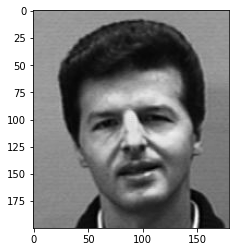

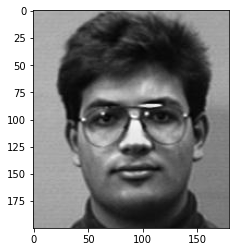

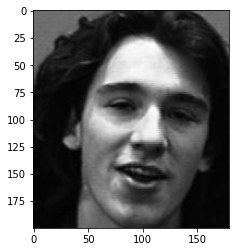

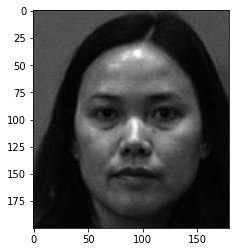

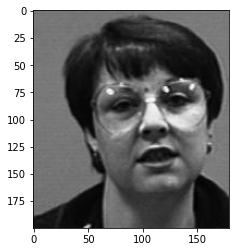

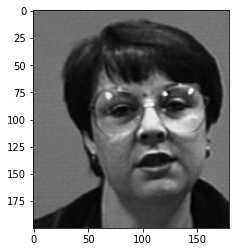

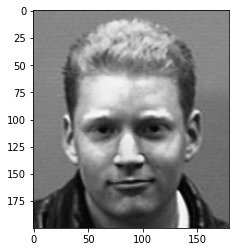

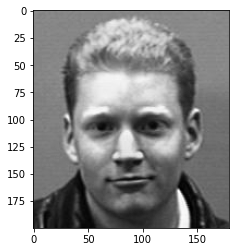

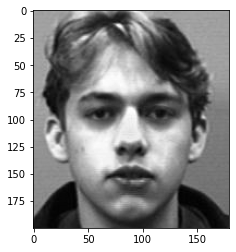

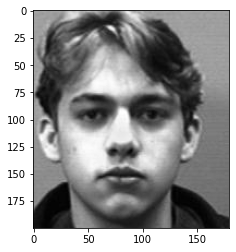

In [11]:
for test_image in sample_faces(5):
    fr.match(test_image)